In [24]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Saurav\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
# Imort main librarie
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library


In [7]:
df=pd.read_csv('Amazon.csv')

In [8]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


In [9]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [10]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [73]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-21,3261.679932,3191.060059,3222.419922,3229.830078,3326900.0,3229.830078
2022-03-22,3323.340088,3233.979980,3236.110107,3297.780029,3204300.0,3297.780029
2022-03-23,3327.399902,3253.739990,3274.100098,3268.159912,2790600.0,3268.159912
2022-03-24,3282.370117,3201.000000,3274.989990,3272.989990,2834900.0,3272.989990
2022-03-25,3307.370117,3247.489990,3280.000000,3282.010010,1584383.0,3282.010010


# Now Plots

Text(0.5, 1.0, 'Amazon Stock at all time')

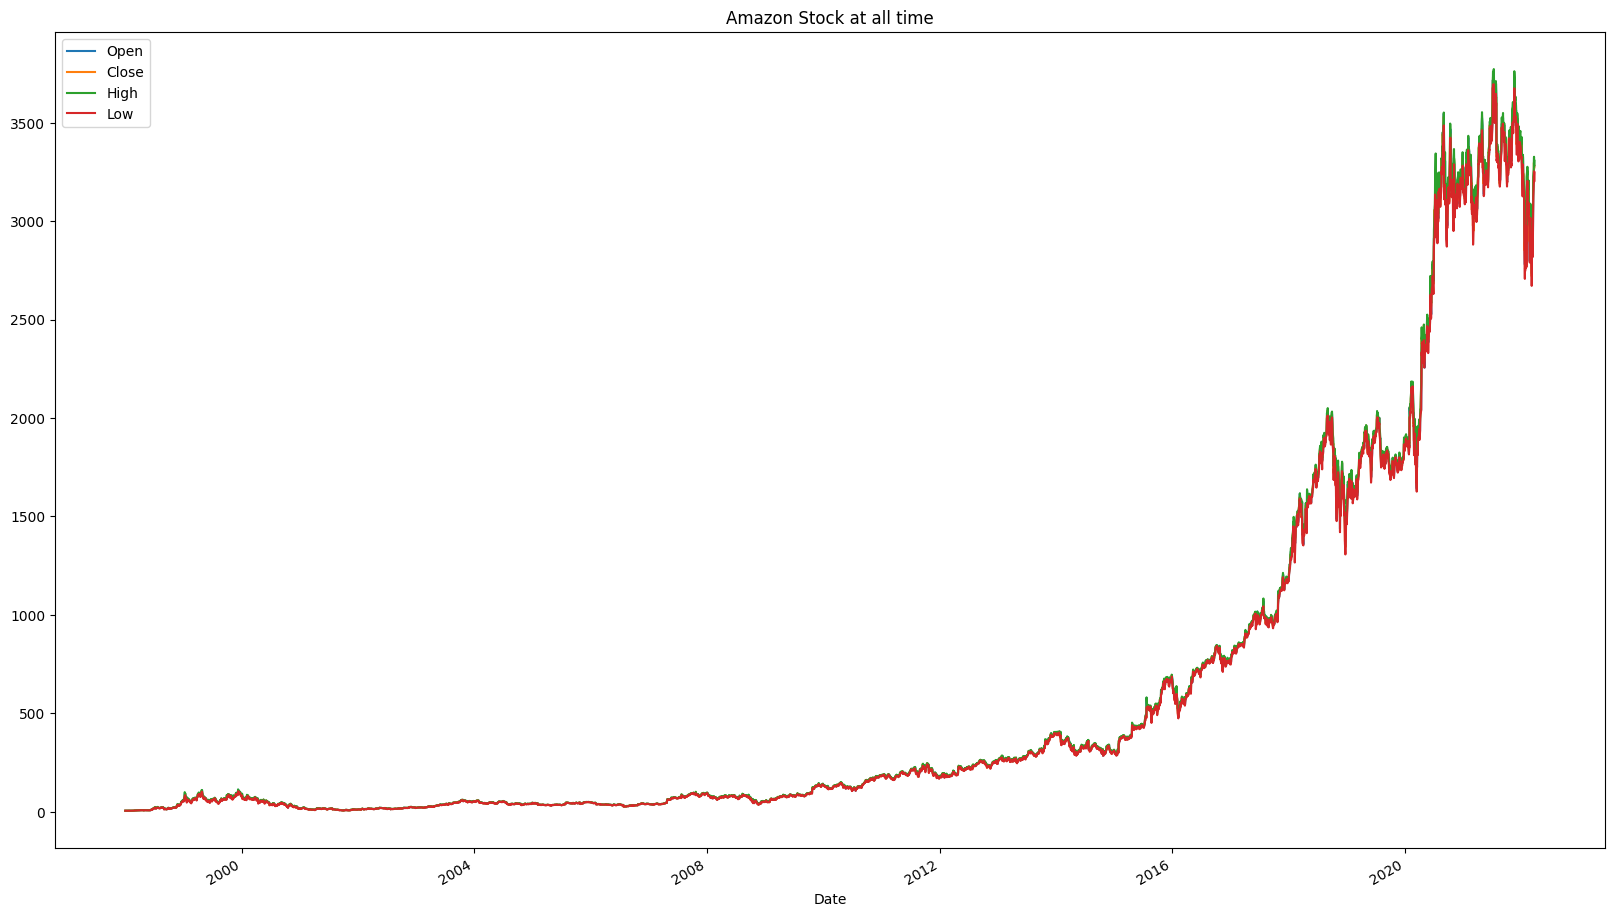

In [12]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Amazon Stock at all time')

Text(0, 0.5, 'Stock action')

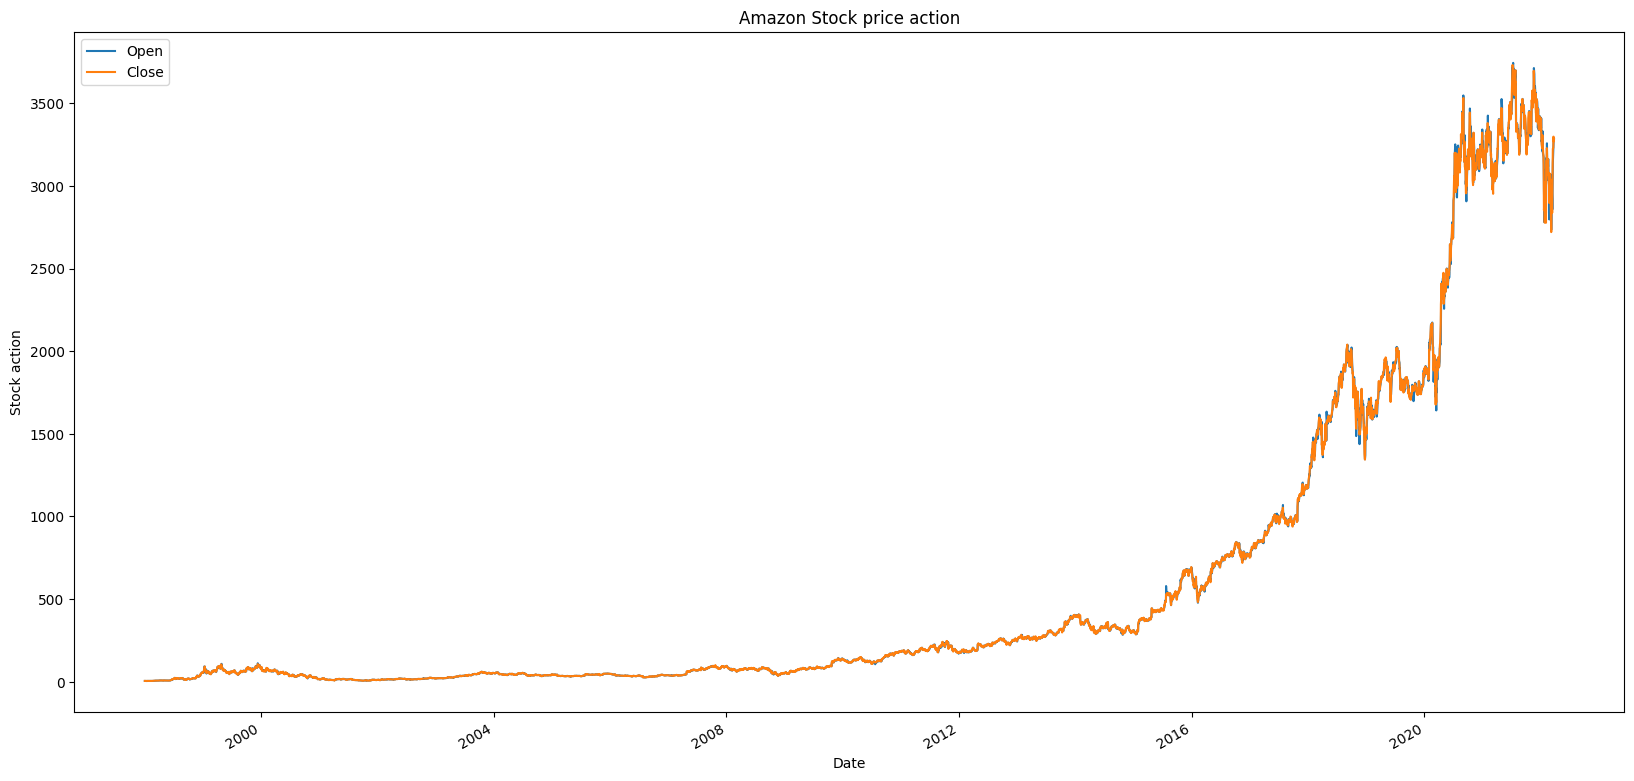

In [13]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

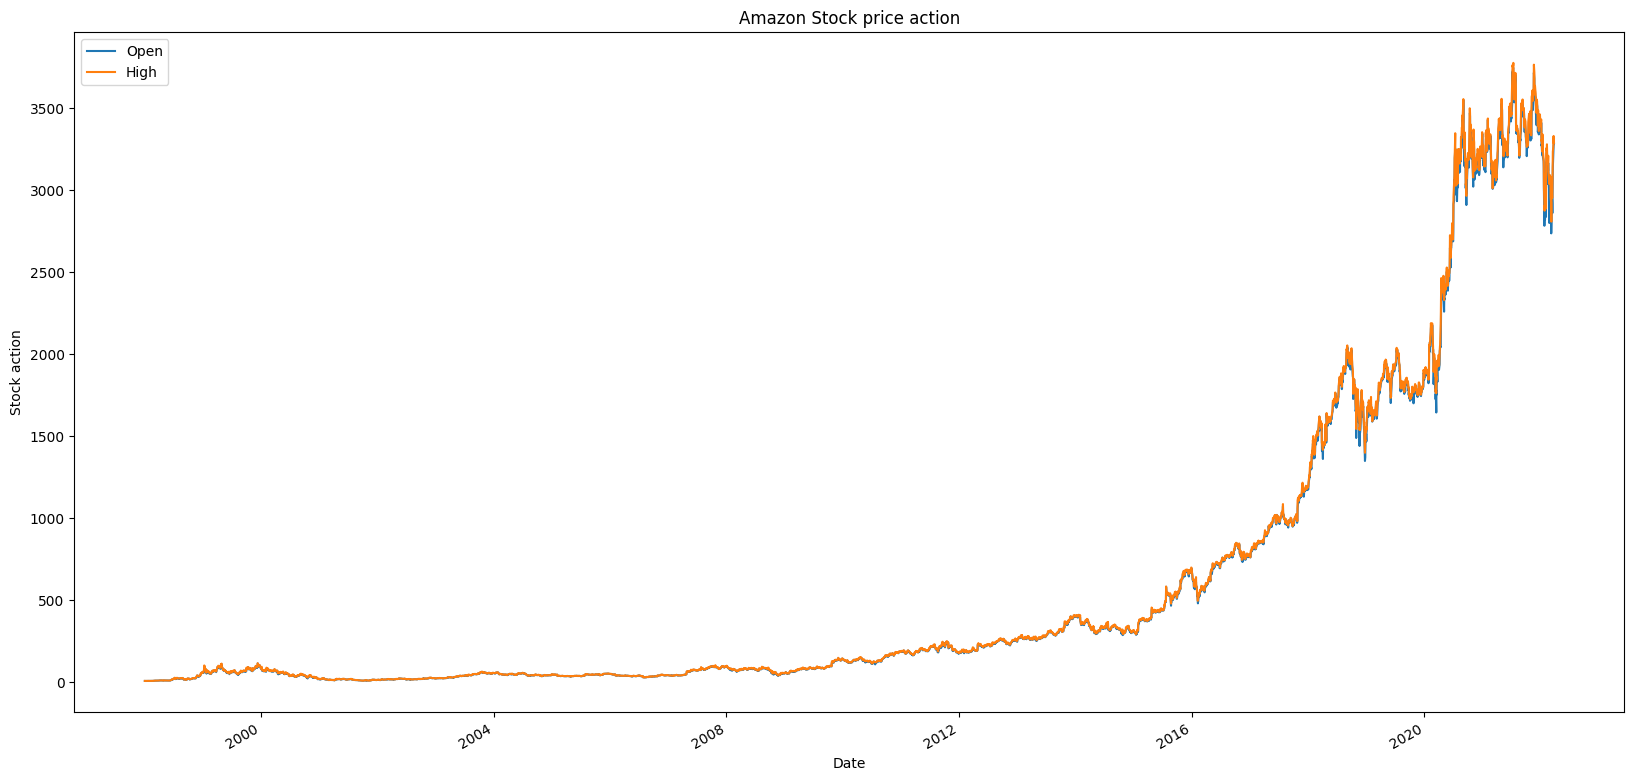

In [14]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

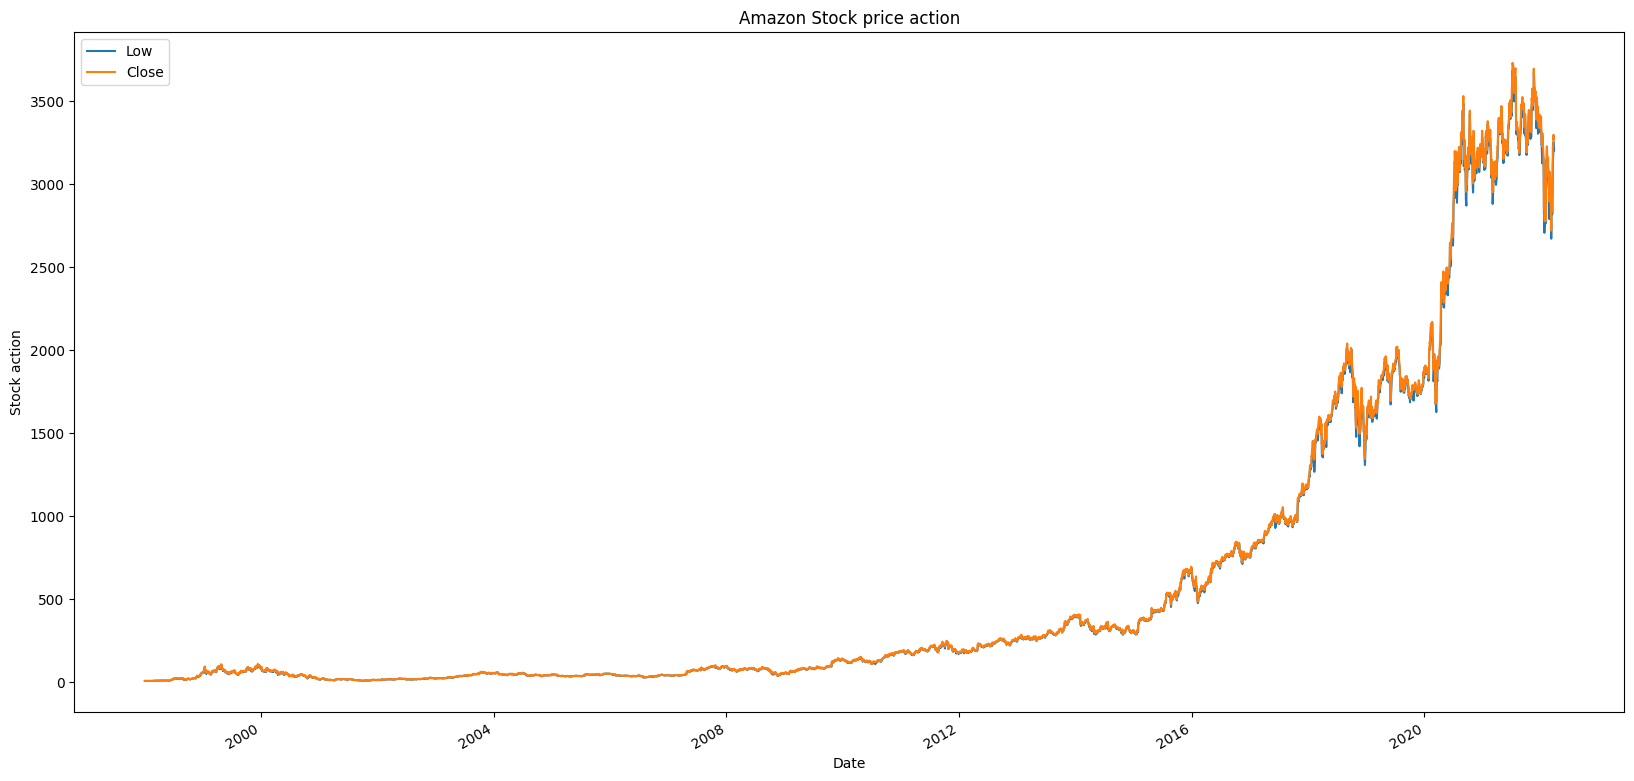

In [15]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

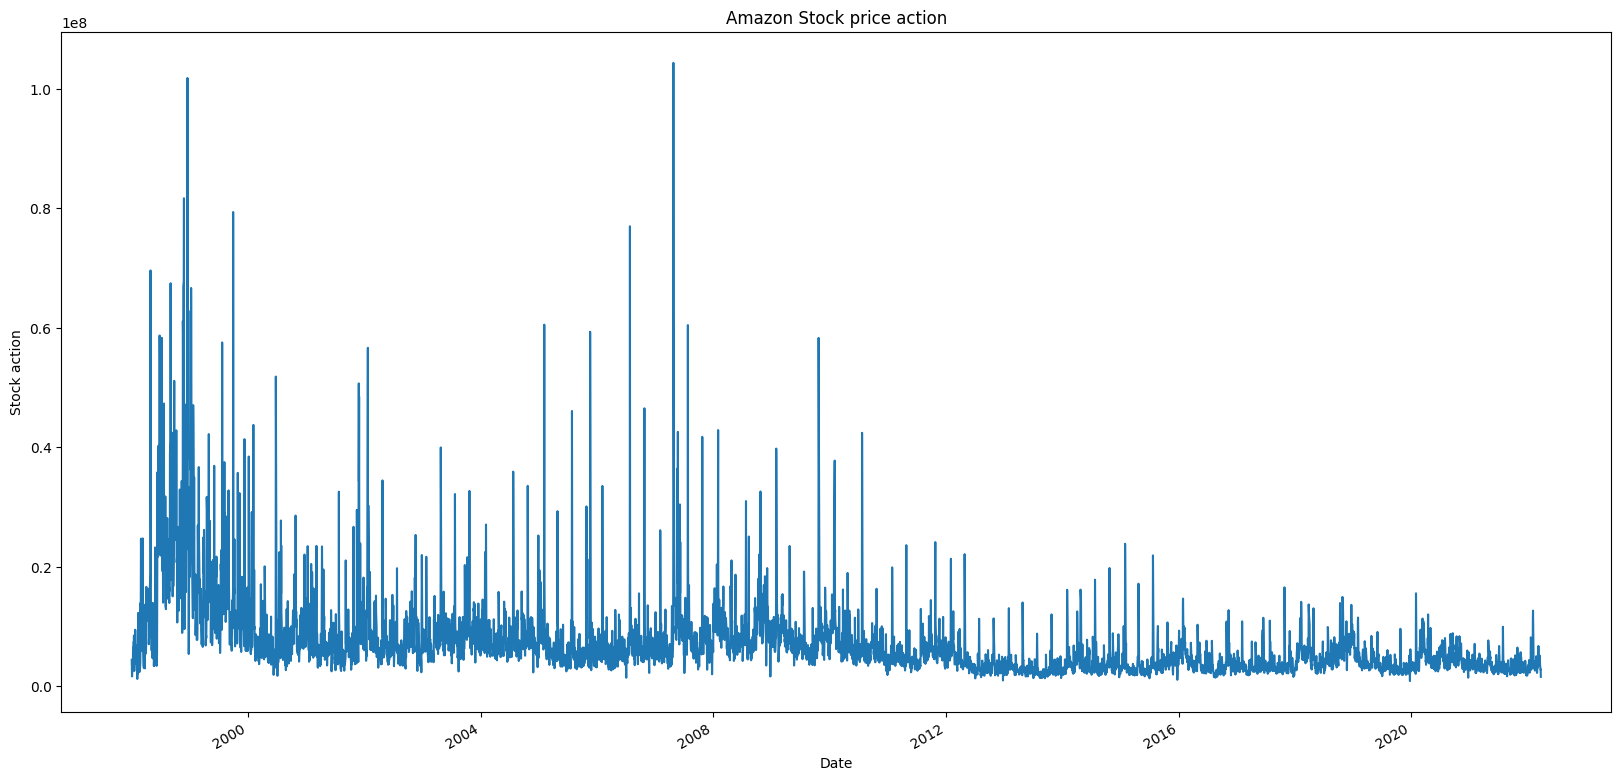

In [16]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

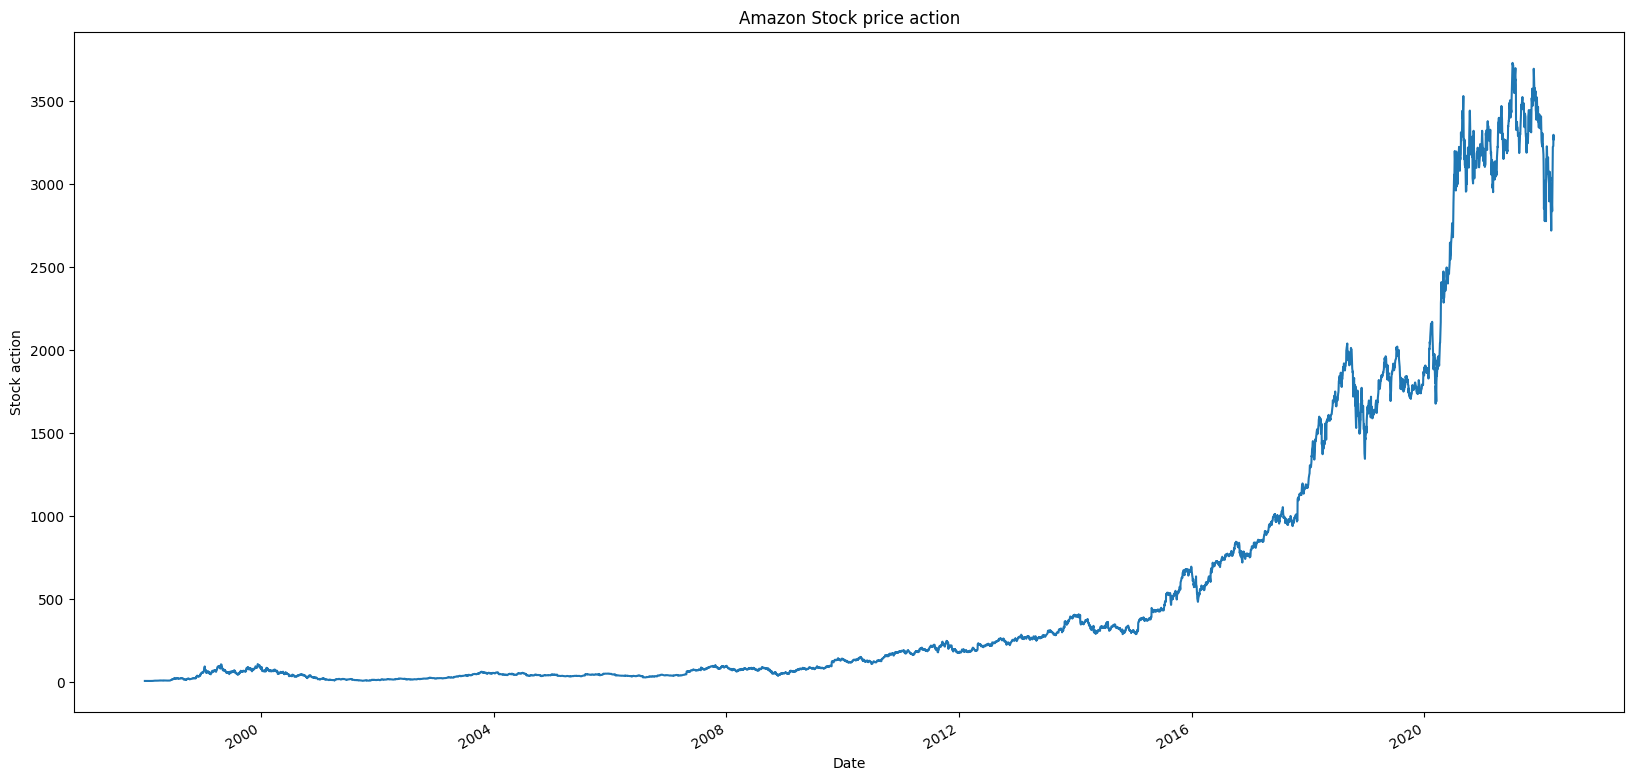

In [17]:
df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

# From the previous analysis and visualization, it can take the data from 2015 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2022')

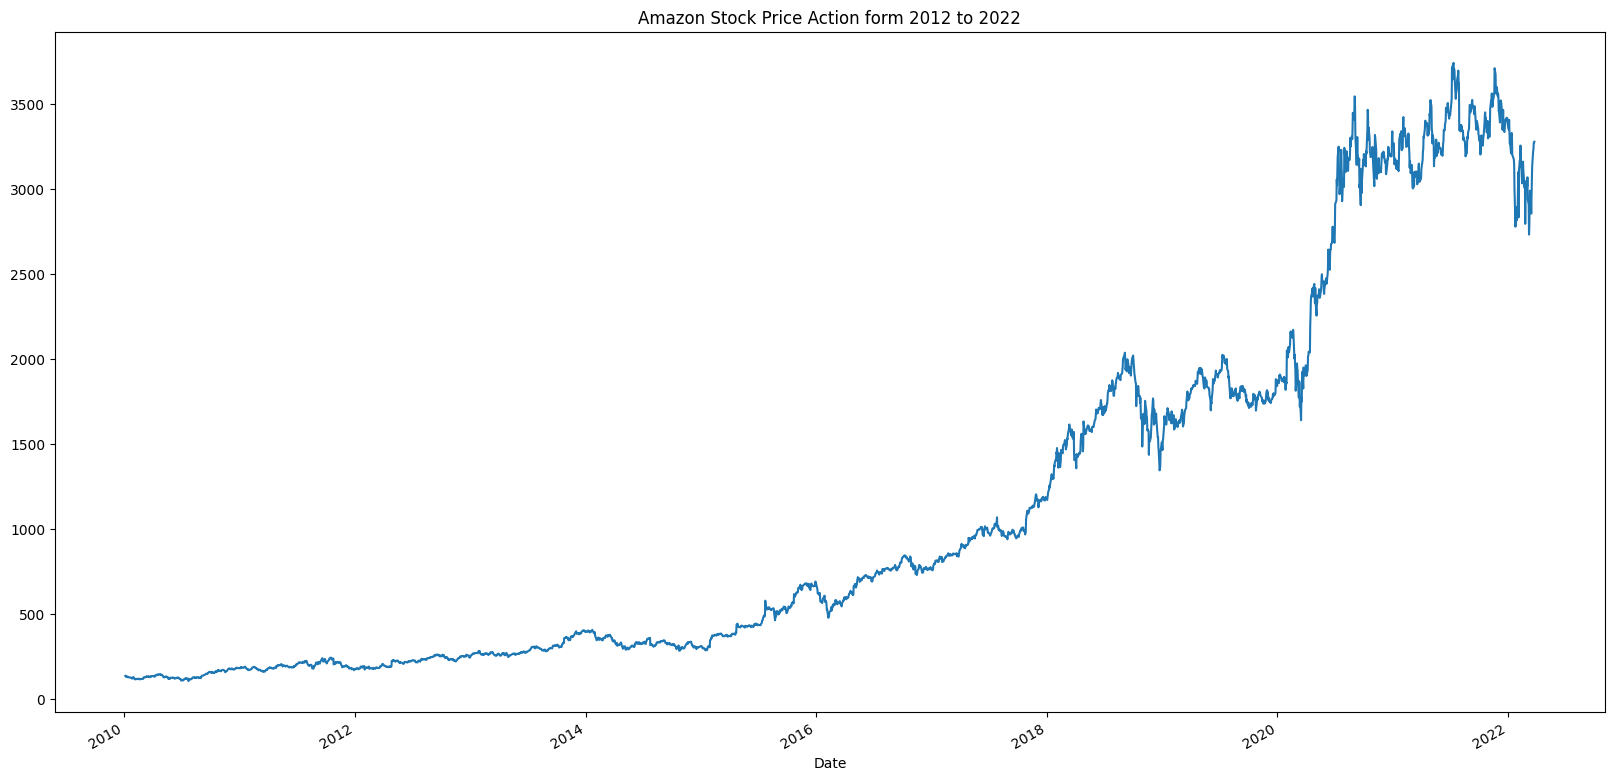

In [18]:
Ama = df['2010':'2022']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2022')

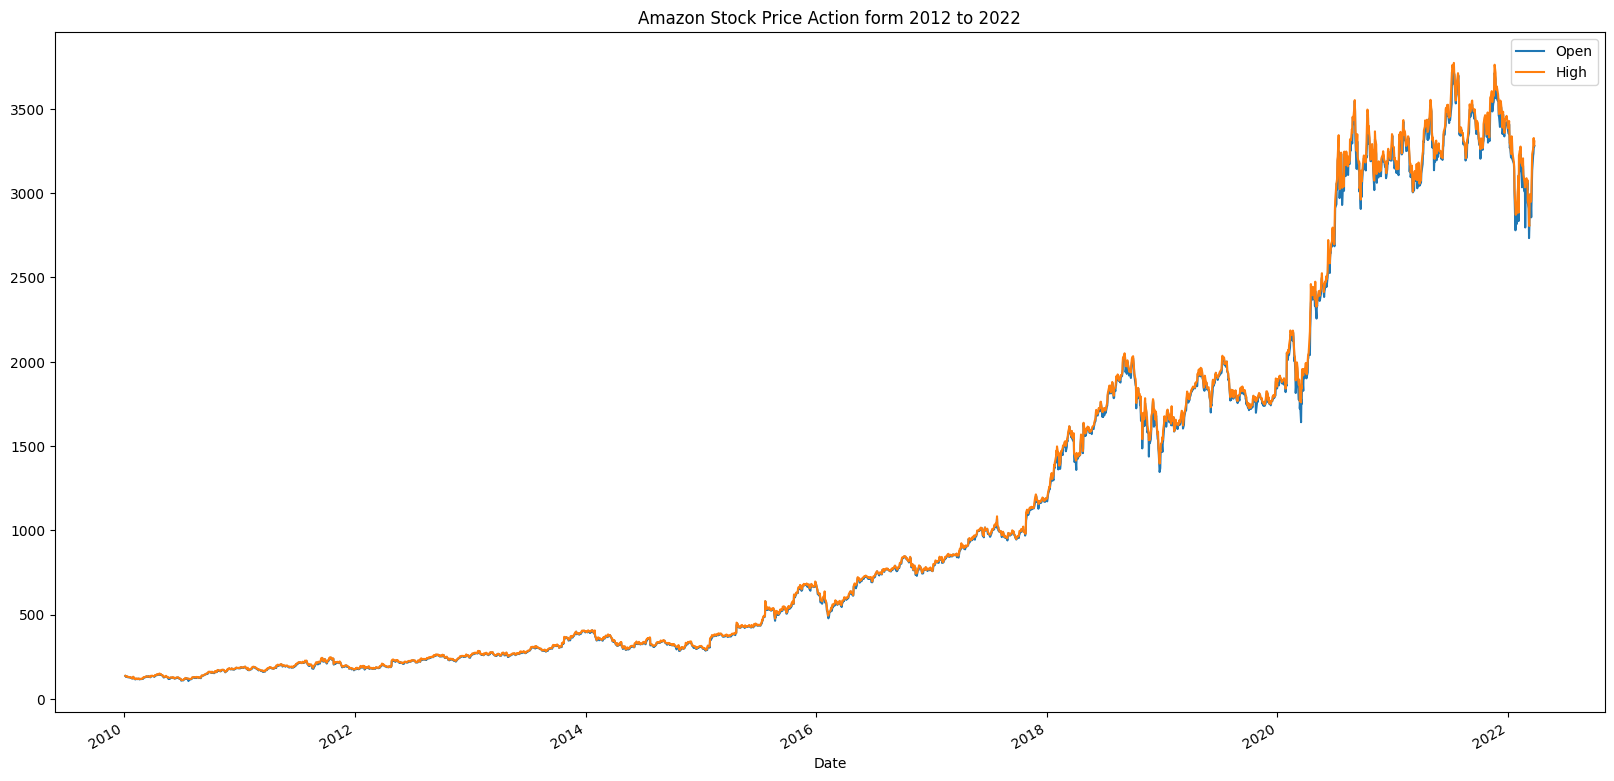

In [19]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

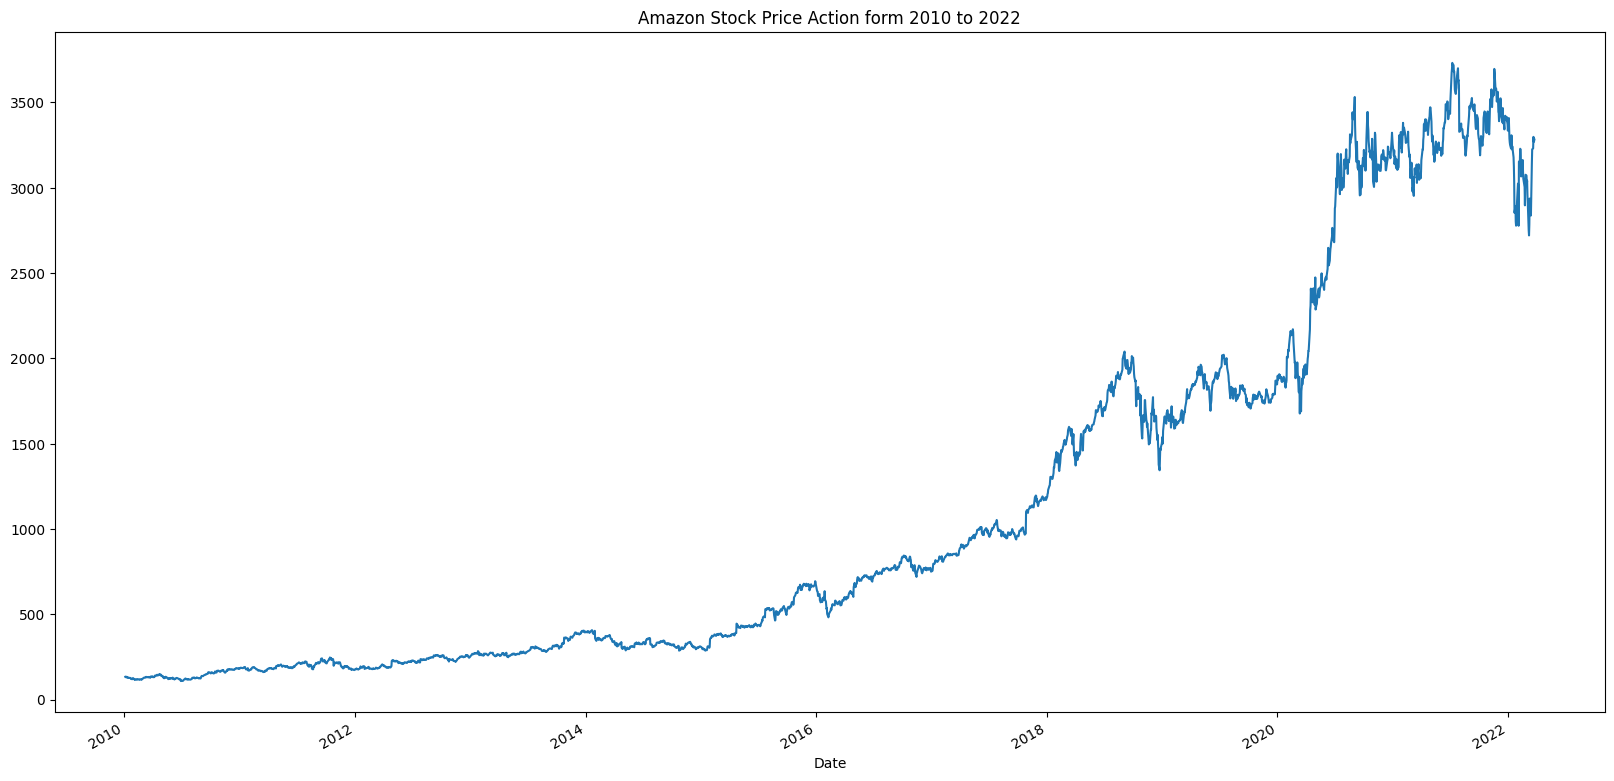

In [20]:
Ama['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

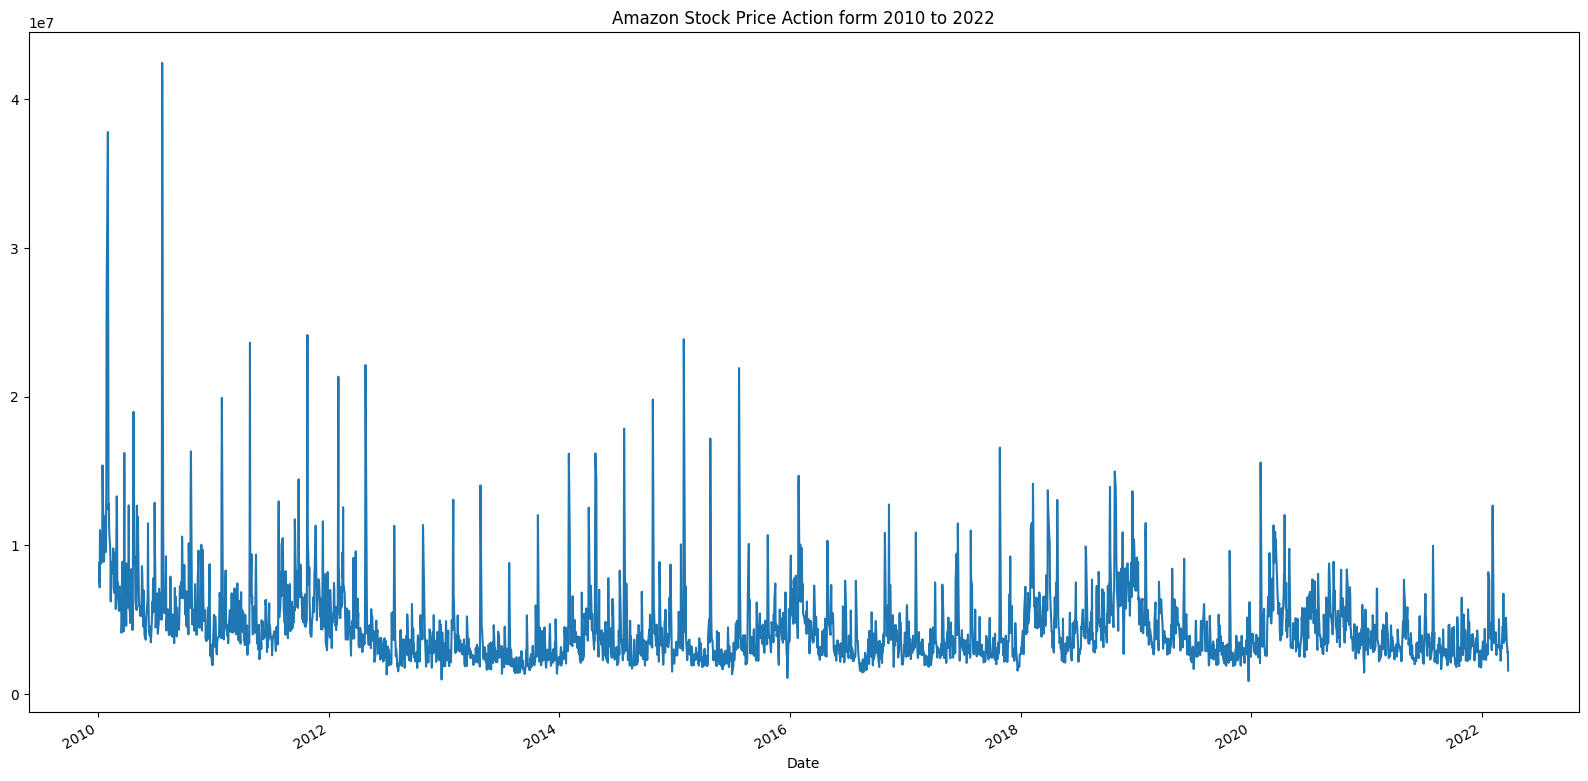

In [21]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

In [22]:
Ama.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3079.000000,3079.000000,3079.000000,3079.000000,3.079000e+03,3079.000000
mean,1116.621395,1091.651838,1104.820826,1104.411010,4.457763e+06,1104.411010
std,1080.535486,1055.277226,1068.628180,1067.761552,2.700779e+06,1067.761552
min,111.290001,105.800003,105.930000,108.610001,8.813000e+05,108.610001
25%,261.914993,256.779999,259.095001,259.145004,2.814300e+06,259.145004
50%,628.630005,616.250000,624.469971,625.900024,3.760800e+06,625.900024
75%,1792.779968,1757.025024,1775.599976,1776.475037,5.250400e+06,1776.475037
max,3773.080078,3696.790039,3744.000000,3731.409912,4.242110e+07,3731.409912


# Augmented Dickey Fuller Test (ADF)

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    2.248104
p-value                           0.998920
#Lags Used                       31.000000
Number of Observations Used    6067.000000
Critical Value (1%)              -3.431428
Critical Value (5%)              -2.862017
Critical Value (10%)             -2.567024
dtype: float64
None


In [27]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                   1.558802
p-value                          0.997729
#Lags Used                      16.000000
Number of Observations Used    275.000000
Critical Value (1%)             -3.454355
Critical Value (5%)             -2.872108
Critical Value (10%)            -2.572401
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -5.390742
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64
None


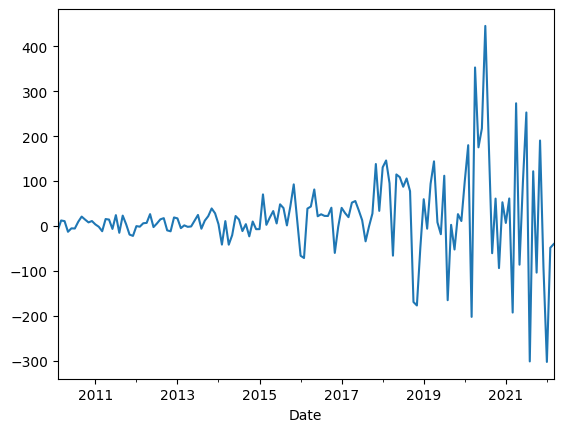

In [28]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()


print(adf_test(Ama_open_diff))

In [72]:
train_Ama = Ama['Open'].iloc[:-4]

print(len(train_Ama))
X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

3075


C:\Users\Saurav\AppData\Local\Temp\ipykernel_14960\2207947505.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train.append(train_Ama[i])


In [57]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len

2460

In [75]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [60]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11701 (45.71 KB)
Trainable params: 11701 (45.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
31/31 - 2s - loss: 1540499.8750 - 2s/epoch - 77ms/step
Epoch 2/10
31/31 - 0s - loss: 45214.5352 - 77ms/epoch - 2ms/step
Epoch 3/10
31/31 - 0s - loss: 1867.4037 - 87ms/epoch - 3ms/step
Epoch 4/10
31/31 - 0s - loss: 1149.1626 - 70ms/epoch - 2ms/step
Epoch 5/10
31/31 - 0s -

<Axes: >

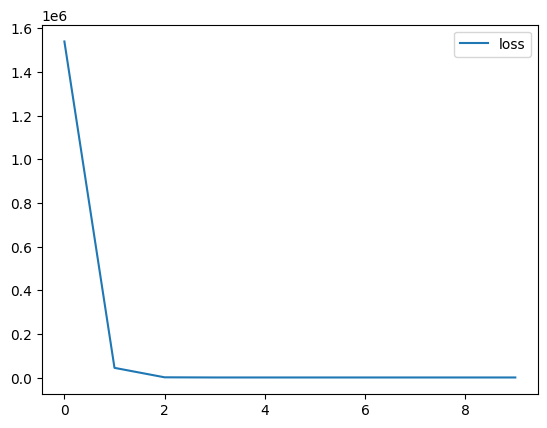

In [61]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [62]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

C:\Users\Saurav\AppData\Local\Temp\ipykernel_14960\3680827418.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_val.append(test_data[i])


In [63]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

20/20 [==============================] - 0s 2ms/step


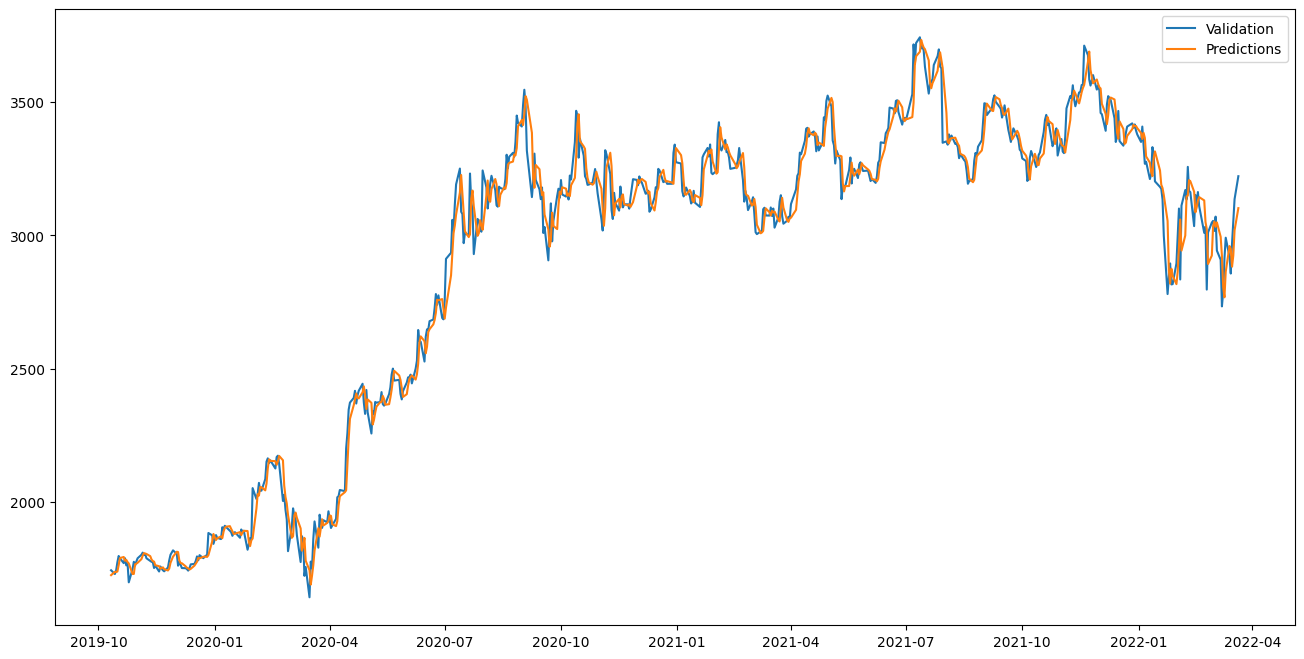

In [76]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['Open','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [77]:
# data frame to see the percentage of error between real and predicted

variance = []
for i in range(len(valid)):
  
  variance.append(valid['Open'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

C:\Users\Saurav\AppData\Local\Temp\ipykernel_14960\317183523.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variance.append(valid['Open'][i]-valid['Predictions'][i])


,0
count,615.000000
mean,3.098628
std,66.599933
min,-281.535645
25%,-29.763428
50%,2.859619
75%,36.304321
max,228.506836


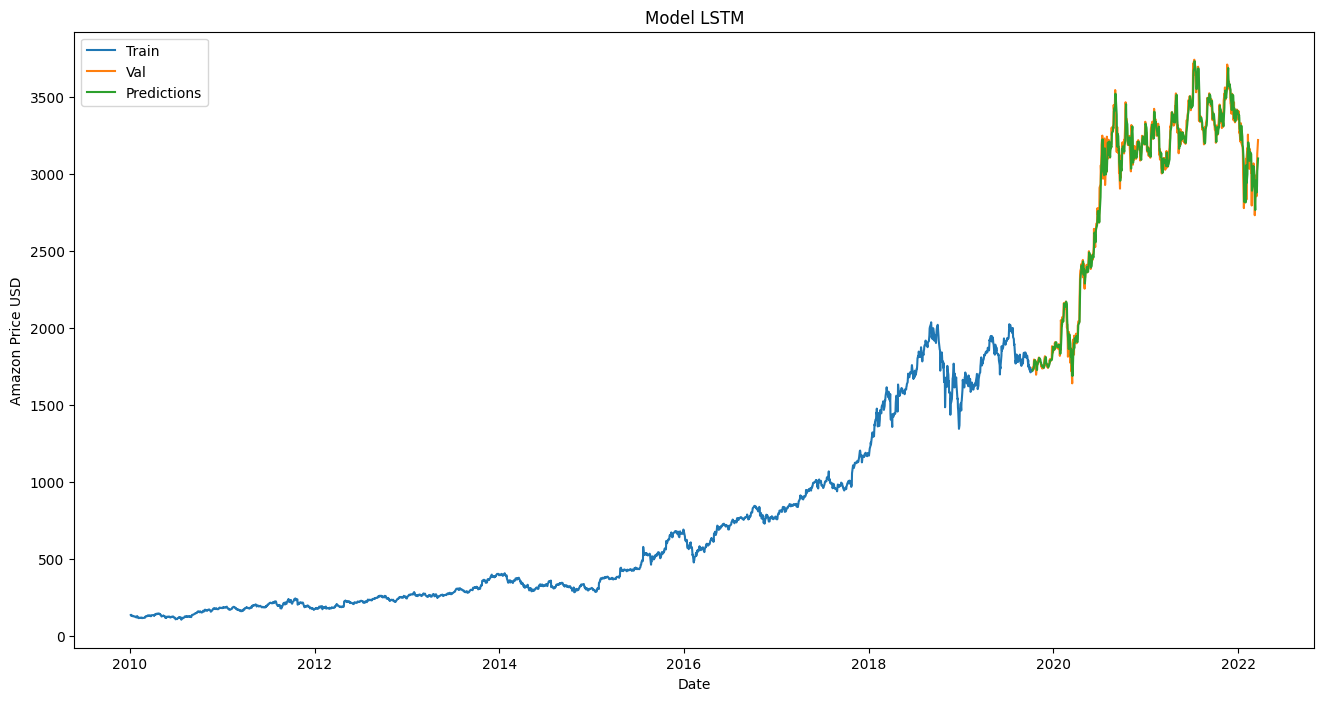

In [78]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['Open','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()